# Case Study (K-Nearest Neighbors) on Gene Expressions

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Please Load the DataSet

In [2]:
# Load Data on Gene Expressions
# Preview

df = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/gene_expression.csv') # gene_expressions.csv
df.tail(5)

,Gene One,Gene Two,Cancer Present
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0
2999,4.6,8.2,0


## Let us Add a Validation Dataset

In [3]:
# Add Data for Validation

data = [[4.8, 3.9, -1],[2.5, 6.1, -1],[6.2, 7.1, -1],[5.2, 3.9, -1],[5.9, 3.5, -1]] # -1 means, it is a validation set only as we will predict via KNN the Cancer's Presence

validation_set = np.array(data)
validation_set = pd.DataFrame(data, index = list(np.arange(3000, 3005, 1)), columns = df.columns)
validation_set


,Gene One,Gene Two,Cancer Present
3000,4.8,3.9,-1
3001,2.5,6.1,-1
3002,6.2,7.1,-1
3003,5.2,3.9,-1
3004,5.9,3.5,-1


In [4]:
# Insert the the Validation Set to the original DataFrame for Scaling Purposes
# Note: Data 3000 to 3004 are validation set

df = pd.concat([df, validation_set], axis = 0)
df.tail(6)

,Gene One,Gene Two,Cancer Present
2999,4.6,8.2,0
3000,4.8,3.9,-1
3001,2.5,6.1,-1
3002,6.2,7.1,-1
3003,5.2,3.9,-1
3004,5.9,3.5,-1


## Scale the Data to Avoid Extreme Value Differences

In [5]:
# Import Standard Scaler

from sklearn.preprocessing import StandardScaler

In [6]:
# Instance of Scaler, you do not need to scale the 'Cancer Present'

scaler = StandardScaler()
scaler.fit(df.drop('Cancer Present', axis = 1))

StandardScaler()

In [7]:
# Transform the Data (Scaled Features)

scaled_features = scaler.transform(df.drop('Cancer Present', axis = 1))
scaled_features

array([[-0.71078857, -0.87338608],
       [-1.69571372,  0.51512913],
       [ 0.05526433, -0.87338608],
       ...,
       [ 0.32885466,  0.97796754],
       [-0.21832599, -0.87338608],
       [ 0.16470046, -1.10480529]])

In [8]:
# Scaled Data DataFrame

df_feat = pd.DataFrame(scaled_features, columns = df.columns[0:-1]) # excluding the last columns (:-1)
df_feat.head()

,Gene One,Gene Two
0,-0.710789,-0.873386
1,-1.695714,0.515129
2,0.055264,-0.873386
3,0.274137,0.457274
4,0.985471,-1.162660


## Train - Test Split

In [9]:
# Import Train Test Split

from sklearn.model_selection import train_test_split

In [10]:
# Split
# You need to remove the data 3000 to 3004 from the dataset

X = df_feat.iloc[:3000,:]
y = df.iloc[:3000, -1]

In [11]:
# Check if data 3000 to 3004 were removed on the Class Label

y

0       1
1       0
2       1
3       0
4       1
       ..
2995    1
2996    0
2997    0
2998    0
2999    0
Name: Cancer Present, Length: 3000, dtype: int64

In [12]:
# Train - Test Split / with Random State of 101, test size of 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [13]:
# Show features of X_train

print(len(X_train)) # Length of Training Data
X_train.head(5)

2100


,Gene One,Gene Two
19,0.876035,-0.699822
369,0.274137,-0.641967
2165,-1.203251,0.399420
1911,0.438291,1.267242
1295,-0.273044,-0.989096


In [14]:
# Show more target class y_train

print(len(y_train)) # Length of Training Data
y_train.head(5)

2100


19      1
369     1
2165    0
1911    0
1295    1
Name: Cancer Present, dtype: int64

## Implement a K-Nearest Neighbor Classifier

In [15]:
# Import

from sklearn.neighbors import KNeighborsClassifier

In [16]:
# Instance of KNN, start with K of 1

model = KNeighborsClassifier(n_neighbors = 1)

In [17]:
# Fit

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
# Predictions on X_test

predictions = model.predict(X_test)
predictions

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,

## Evaluation Metrics

In [19]:
# Imports

from sklearn.metrics import confusion_matrix, classification_report

<Axes: >

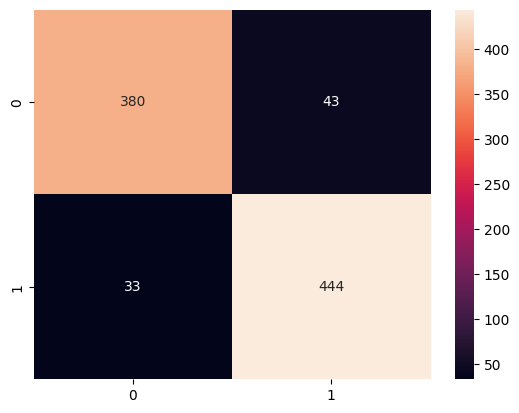

In [20]:
# Confusion Matrix via Heat Map

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt = 'g')

In [21]:
# Classification Report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       423
           1       0.91      0.93      0.92       477

    accuracy                           0.92       900
   macro avg       0.92      0.91      0.92       900
weighted avg       0.92      0.92      0.92       900



## Elbow Method for Selecting Optimized K Values (n_neighbors), What is the optimized K value?

In [22]:
# Iterate through error_rates 1 to 60

error_rate = []

for i in range(1, 61):

  model = KNeighborsClassifier(n_neighbors = i)
  model.fit(X_train, y_train)
  pred_i = model.predict(X_test)

  error_rate.append(np.mean(pred_i != y_test))

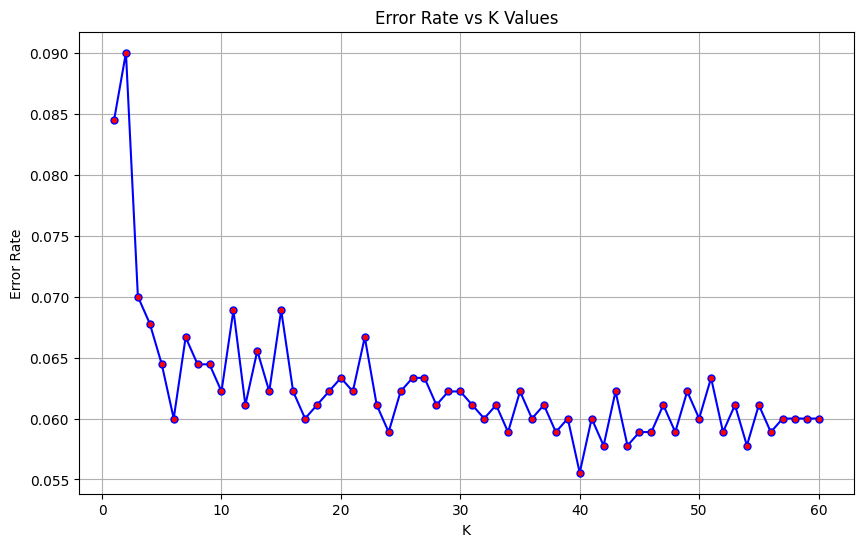

In [23]:
# Plot Graph

plt.figure(figsize = (10,6))
plt.plot(range(1, 61), error_rate, color = 'b', linestyle = '-', marker = 'o', markerfacecolor = 'r', markersize = 5)
plt.title('Error Rate vs K Values')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

## Re-Model with new Values of K based on the Elbow Graph

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       423
           1       0.95      0.95      0.95       477

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



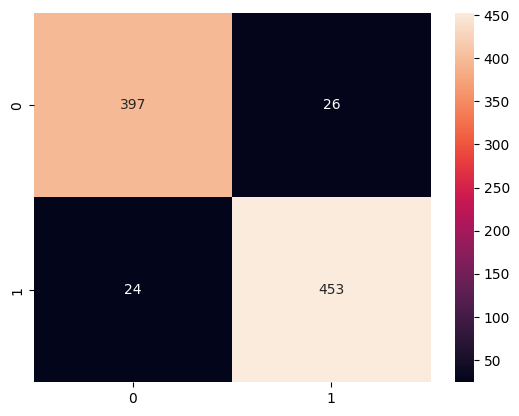

In [34]:
# Re-Model, Expect an Improved Accuracy

new_model = KNeighborsClassifier(n_neighbors = 40)
new_model.fit(X_train, y_train)
predictions = new_model.predict(X_test)

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt = 'g')
print(classification_report(y_test, predictions))

In [36]:
# Prediction for our Validation Data

feature_validation = df_feat.iloc[3000:, :]
y_prediction = new_model.predict(feature_validation)

pd.concat([feature_validation, pd.DataFrame(y_prediction, index = list(range(3000, 3005)), columns = ['Cancer Present'])], axis = 1)

,Gene One,Gene Two,Cancer Present
3000,-0.437198,-0.873386,1
3001,-1.695714,0.399420,0
3002,0.328855,0.977968,0
3003,-0.218326,-0.873386,1
3004,0.164700,-1.104805,1


## Generate Sample Decision Boundaries

In [37]:
# Import

from mlxtend.plotting import plot_decision_regions

In [38]:
# Customized Functions

# Prediction of Model on Test Data

X = X_test # variables
y = predictions # TARGET CLASS

x_label = 'Gene One'
y_label = 'Gene Two'

# Prediction on Unseen Data

sf_x_label = df_feat.loc[3000:, [x_label]] # 3000 to 3004 data
sf_y_label = df_feat.loc[3000:, [y_label]] # 3000 to 3004 data
sp = y_prediction

In [46]:
# Define Function

def knn_plots(X, y):

  features = X.values
  target = y

  new_model = KNeighborsClassifier(n_neighbors = 40)
  new_model.fit(features, target)

  plt.figure(figsize = (7,7))
  plt.title('KNN Decision Boundaries of Gene Expressions')
  plt.xlabel(x_label)
  plt.ylabel(y_label)

  plot_decision_regions(features, target, clf = new_model, legend = 'upper left', colors = 'red,cyan')
  plt.scatter(x = sf_x_label, y = sf_y_label, c = sp, marker = '*', s = 300, alpha = 0.85)

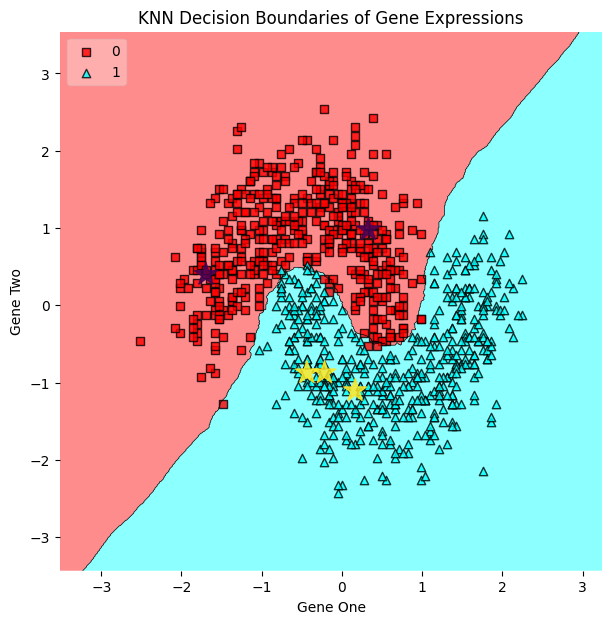

In [47]:
# Execute Function and Generate the Decision Boundary

knn_plots(X[[x_label, y_label]], y)

## Congratulations, this is an Advanced Classification Algorithm!